<a href="https://colab.research.google.com/github/sarnavadatta/Email-Marketing/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
df=pd.read_csv('/content/drive/My Drive/DS projects/Metyis/data01.csv',sep=",")

In [4]:
x=df['history_segment'].str.replace('[^0-9]', '', regex=True).astype('int64')
category=pd.DataFrame(np.floor(x/1000000))
category[:]=np.where(category > 10, 6, category)
category[:]=np.where(category < 1, 1, category)

df['Categorization']=category
df=df.drop(columns=['Unnamed: 0', 'history_segment'],axis=1)
df

,recency,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,Categorization
0,10,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,2.0
1,6,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,3.0
2,7,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,2.0
3,9,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,5.0
4,2,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Mens E-Mail,0,0,0.0,2.0
63996,5,38.91,0,1,Urban,1,Phone,Mens E-Mail,0,0,0.0,1.0
63997,6,29.99,1,0,Urban,1,Phone,Mens E-Mail,0,0,0.0,1.0
63998,1,552.94,1,0,Surburban,1,Multichannel,Womens E-Mail,0,0,0.0,5.0


In [6]:
# Checking for missing values
df.isna().sum()

recency           0
history           0
mens              0
womens            0
zip_code          0
newbie            0
channel           0
segment           0
visit             0
conversion        0
spend             0
Categorization    0
dtype: int64

In [7]:
# checking unique values of each column
for col in df:
    print(f'number of unique values in {col}:', df[col].nunique())

number of unique values in recency: 12
number of unique values in history: 34833
number of unique values in mens: 2
number of unique values in womens: 2
number of unique values in zip_code: 3
number of unique values in newbie: 2
number of unique values in channel: 3
number of unique values in segment: 3
number of unique values in visit: 2
number of unique values in conversion: 2
number of unique values in spend: 429
number of unique values in Categorization: 6


In [8]:
df[col].unique()

array([2., 3., 5., 1., 6., 4.])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         64000 non-null  int64  
 1   history         64000 non-null  float64
 2   mens            64000 non-null  int64  
 3   womens          64000 non-null  int64  
 4   zip_code        64000 non-null  object 
 5   newbie          64000 non-null  int64  
 6   channel         64000 non-null  object 
 7   segment         64000 non-null  object 
 8   visit           64000 non-null  int64  
 9   conversion      64000 non-null  int64  
 10  spend           64000 non-null  float64
 11  Categorization  64000 non-null  float64
dtypes: float64(3), int64(6), object(3)
memory usage: 5.9+ MB


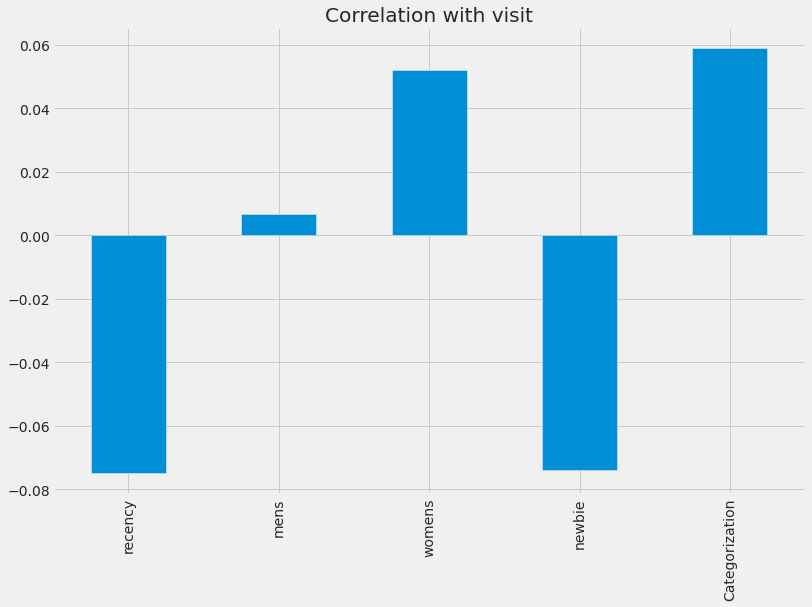

In [5]:
df.drop(['visit','history','conversion','spend'], axis=1).corrwith(df.visit).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with visit")

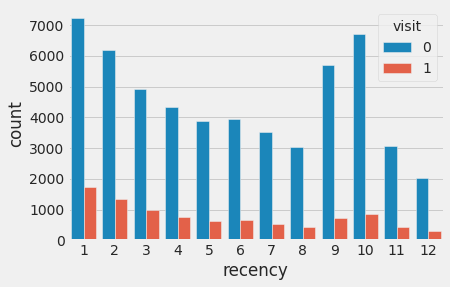

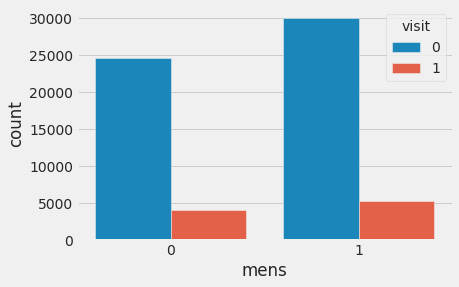

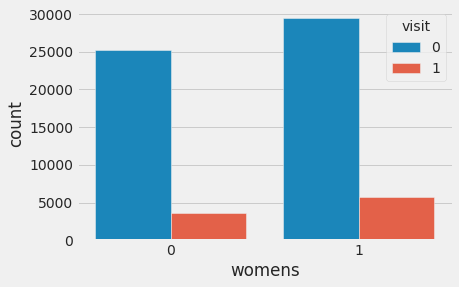

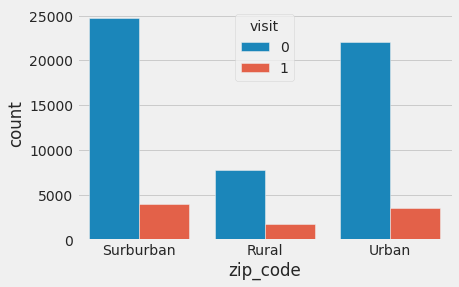

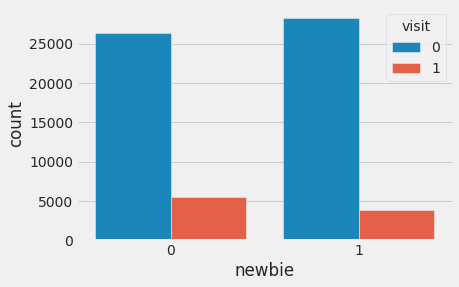

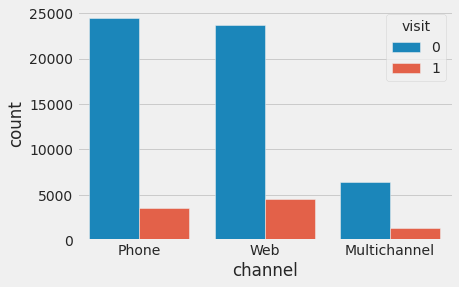

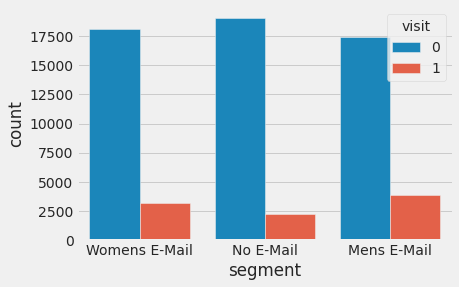

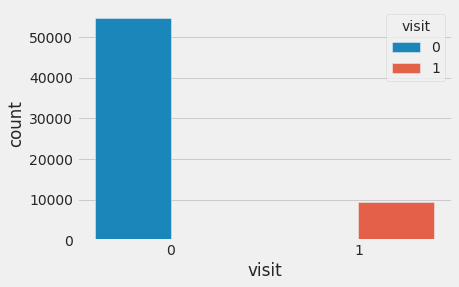

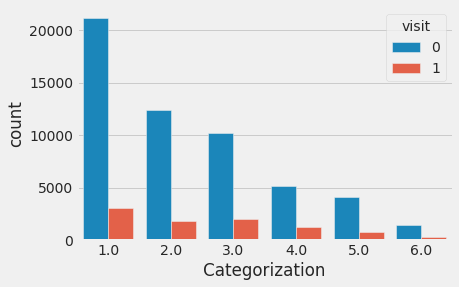

In [10]:
for i, predictor in enumerate(df.drop(columns=['history', 'conversion', 'spend'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='visit')

In [11]:
# Total spend
df['spend'].sum()

67258.12999999999

In [12]:
# dataframe of customers who visits the email
df_visit=df[df['visit']==1]

In [13]:
df_visit.groupby(['segment']).sum()

,recency,history,mens,womens,newbie,visit,conversion,spend,Categorization
segment,,,,,,,,,
Mens E-Mail,20165,1092584.38,2302,2279,1647,3894,267,30311.69,9902.0
No E-Mail,11098,652531.54,1350,1300,843,2262,122,13908.33,5885.0
Womens E-Mail,16942,907033.28,1600,2171,1391,3238,189,23038.11,8258.0


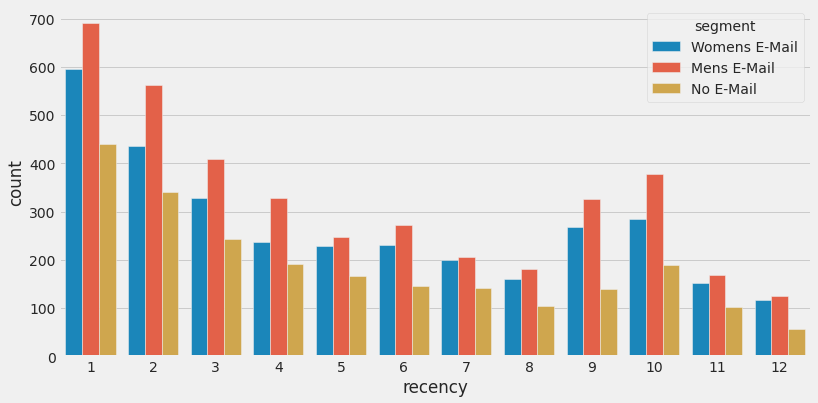

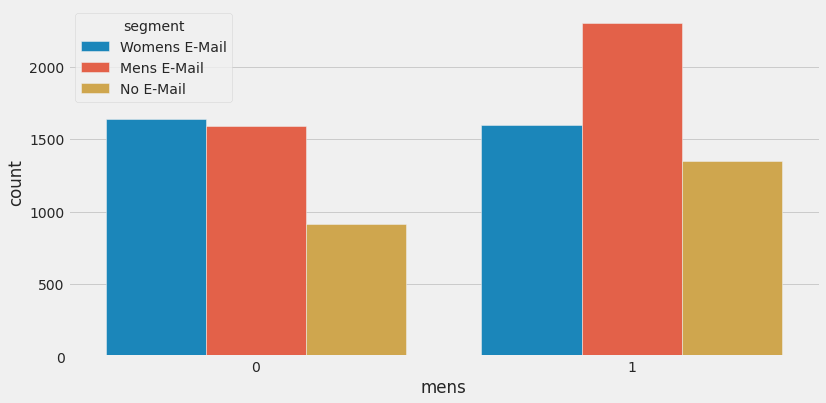

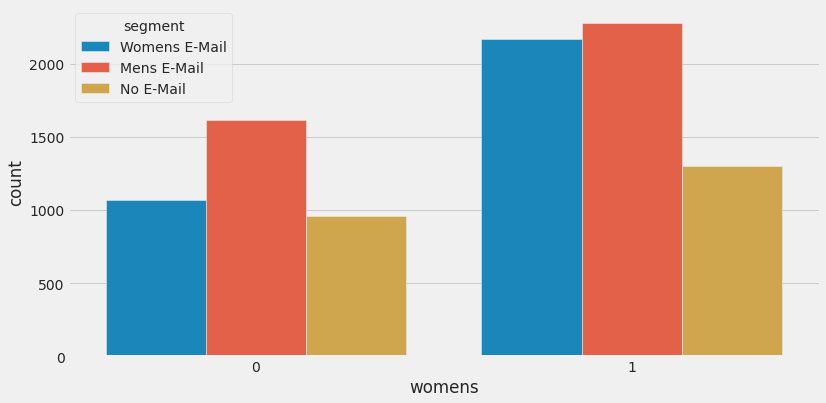

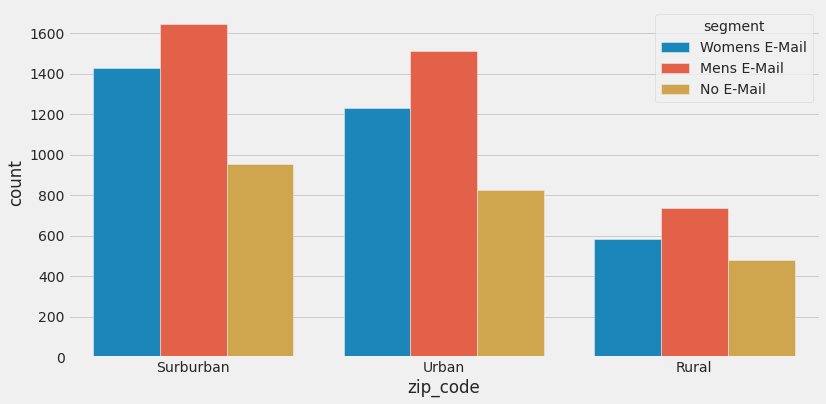

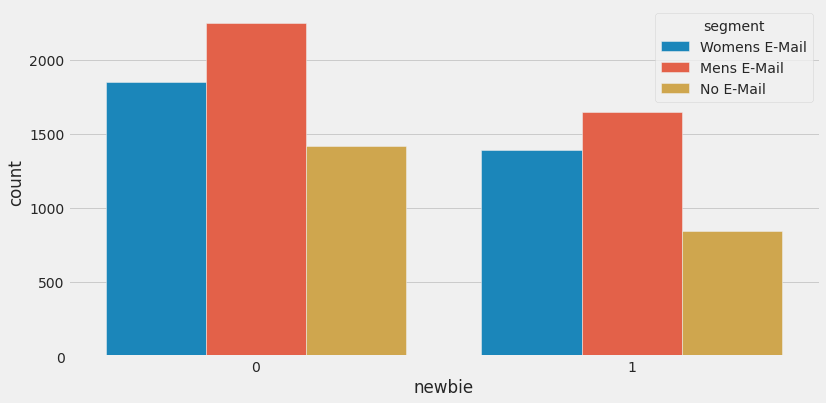

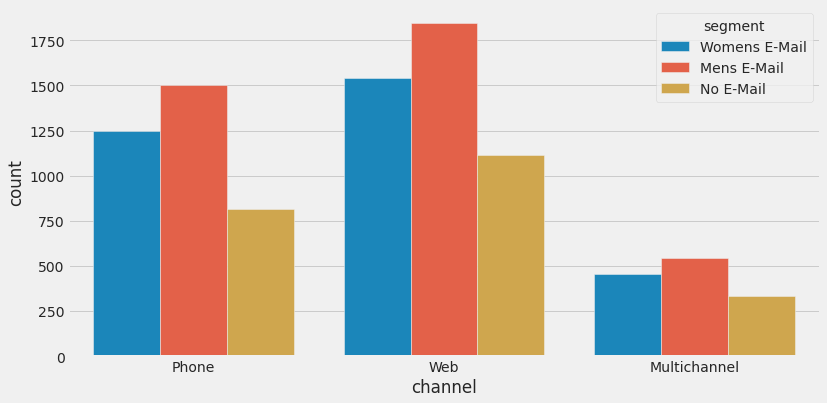

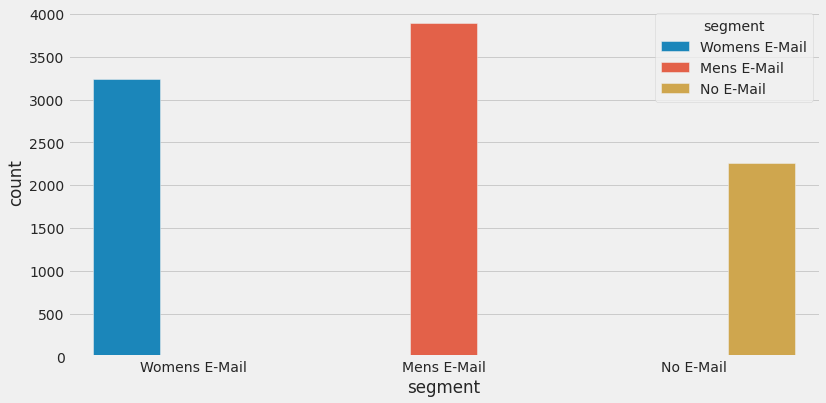

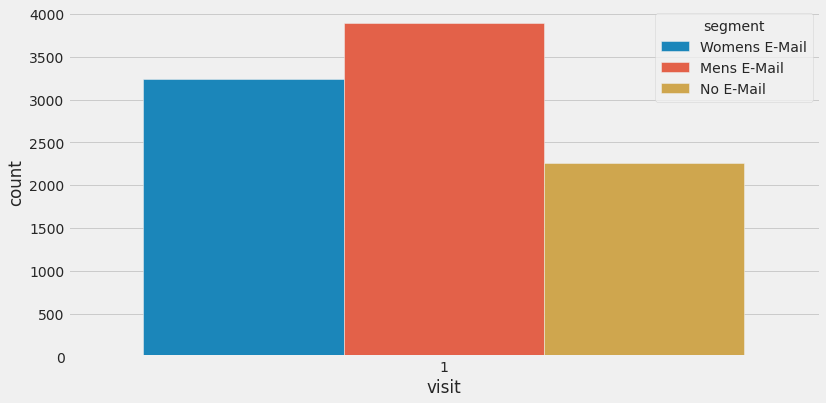

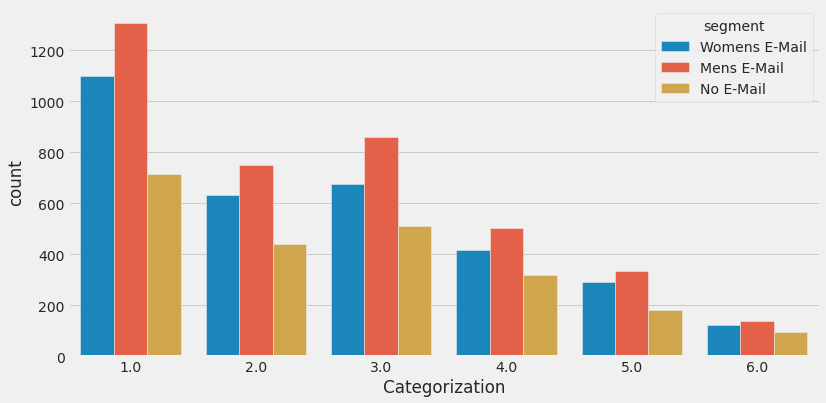

In [14]:
for i, predictor in enumerate(df_visit.drop(columns=['history', 'conversion', 'spend'])):
    plt.figure(i,figsize=(12,6))
    sns.countplot(data=df_visit, x=predictor, hue='segment')

In [15]:
# dataframe of customers who purchased merchendised after the email
df_conversion=df[df['conversion']==1]
df_conversion.groupby(['segment']).sum()

,recency,history,mens,womens,newbie,visit,conversion,spend,Categorization
segment,,,,,,,,,
Mens E-Mail,1347,86340.81,163,157,119,267,267,30311.69,729.0
No E-Mail,529,38725.18,73,69,40,122,122,13908.33,321.0
Womens E-Mail,937,60463.89,90,130,97,189,189,23038.11,482.0


**Hypothesis testing of Click through rate**

In [16]:
n_mensemail=sum(df["segment"]=="Mens E-Mail")
n_nomail=sum(df["segment"]=="No E-Mail")
n_womensemail=sum(df["segment"]=="Womens E-Mail")

p_mensemail=np.mean(df[df["segment"]=="Mens E-Mail"]["visit"])
p_nomail=np.mean(df[df["segment"]=="No E-Mail"]["visit"])
p_womensemail=np.mean(df[df["segment"]=="Womens E-Mail"]["visit"])

std_mensemail=np.std(df[df["segment"]=="Mens E-Mail"]["visit"])
std_nomail=np.std(df[df["segment"]=="No E-Mail"]["visit"])
std_womensemail=np.std(df[df["segment"]=="Womens E-Mail"]["visit"])

In [17]:
n_mensemail, n_nomail, n_womensemail, p_mensemail, p_nomail, p_womensemail, std_mensemail, std_nomail, std_womensemail

(21307,
 21306,
 21387,
 0.18275684047496127,
 0.10616727682343002,
 0.151400383410483,
 0.3864670461172218,
 0.3080515965797405,
 0.3584387078897056)

In [18]:
mensemail_visit = sum(df[df["segment"]=="Mens E-Mail"]["visit"])
mensemail_novisit = n_mensemail - mensemail_visit

noemail_visit = sum(df[df["segment"]=="No E-Mail"]["visit"])
noemail_novisit = n_nomail - noemail_visit

womensemail_visit = sum(df[df["segment"]=="Womens E-Mail"]["visit"])
womensemail_novisit = n_womensemail - womensemail_visit

In [19]:
from scipy import stats
# 3) Create np array
T = np.array([[mensemail_visit, mensemail_novisit], [noemail_visit,noemail_novisit]])
print(scipy.stats.chi2_contingency(T, correction = False)[1])
# Chi-Squared Test (chi-squared statistic and the p-value)
# p-value = 0%
# Assuming a 5% level of significance, we can deduce that the p-value is 
# smaller than the alpha and that we do reject the null hypothesis. 
# In simpler terms, there is no significant difference between strategies.

5.685165482802424e-112


In [20]:
from scipy import stats
# 3) Create np array
T = np.array([[womensemail_visit, womensemail_novisit], [noemail_visit,noemail_novisit]])
print(scipy.stats.chi2_contingency(T, correction = False)[1])
# Chi-Squared Test (chi-squared statistic and the p-value)
# p-value = 0%
# Assuming a 5% level of significance, we can deduce that the p-value is 
# smaller than the alpha and that we do reject the null hypothesis. 
# In simpler terms, there is no significant difference between strategies.

3.1824031593347586e-44


In [21]:
from scipy import stats
# 3) Create np array
T = np.array([[womensemail_visit, womensemail_novisit], [mensemail_visit, mensemail_novisit]])
print(scipy.stats.chi2_contingency(T, correction = False)[1])
# Chi-Squared Test (chi-squared statistic and the p-value)
# p-value = 0%
# Assuming a 5% level of significance, we can deduce that the p-value is 
# smaller than the alpha and that we do reject the null hypothesis. 
# In simpler terms, there is no significant difference between strategies.

3.802165220636449e-18


In [22]:
def z_test_proportions(p1,p2,n1,n2,p_hat,alpha = .05):
    '''
    Conducts one-tailed Z test to determine if y1 has a greater proportion of 1s than y2, prints results
    INPUT: pandas Series, pandas Series - 1 indicates link was clicked, 0 indicates that it was not, Float - significance level of test
    OUTPUT: none
    '''

    numerator = p1-p2
    denominator = (p_hat*(1 - p_hat)*(1./n1 + 1./n2))**.5
    z = numerator/denominator
    p_value = (1 - stats.norm.cdf(z))
    if p_value <=alpha:
        print ('p1:', p1, ', p2:', p2 ,'P-value for test:', p_value,'. The first proportion is significantly greater than the second proportion.')
    else:
        print ('The first proportion is not significantly higher than the second proportion.', '\n')

In [23]:
z_test_proportions(p_mensemail,p_nomail,
                   n_mensemail,n_nomail,
                   (mensemail_visit+noemail_visit)/(n_mensemail+n_nomail),alpha = .05)

p1: 0.18275684047496127 , p2: 0.10616727682343002 P-value for test: 0.0 . The first proportion is significantly greater than the second proportion.


In [24]:
z_test_proportions(p_womensemail,p_nomail,
                   n_womensemail,n_nomail,
                   (womensemail_visit+noemail_visit)/(n_womensemail+n_nomail),alpha = .05)

p1: 0.151400383410483 , p2: 0.10616727682343002 P-value for test: 0.0 . The first proportion is significantly greater than the second proportion.


In [25]:
z_test_proportions(p_mensemail,p_womensemail,
                   n_mensemail,n_womensemail,
                   (mensemail_visit+womensemail_visit)/(n_mensemail+n_womensemail),alpha = .05)

p1: 0.18275684047496127 , p2: 0.151400383410483 P-value for test: 0.0 . The first proportion is significantly greater than the second proportion.


**Hypothesis on Conversion rate**

In [26]:
# df where visit=1, means the customer visit the website
df_visit.groupby(['segment']).mean()

,recency,history,mens,womens,newbie,visit,conversion,spend,Categorization
segment,,,,,,,,,
Mens E-Mail,5.178480,280.581505,0.591166,0.585259,0.422958,1.0,0.068567,7.784204,2.542886
No E-Mail,4.906278,288.475482,0.596817,0.574713,0.372679,1.0,0.053935,6.148687,2.601680
Womens E-Mail,5.232242,280.121458,0.494132,0.670476,0.429586,1.0,0.058369,7.114920,2.550340


In [27]:
df_visit.groupby(['segment']).sum()

,recency,history,mens,womens,newbie,visit,conversion,spend,Categorization
segment,,,,,,,,,
Mens E-Mail,20165,1092584.38,2302,2279,1647,3894,267,30311.69,9902.0
No E-Mail,11098,652531.54,1350,1300,843,2262,122,13908.33,5885.0
Womens E-Mail,16942,907033.28,1600,2171,1391,3238,189,23038.11,8258.0


In [28]:
# statistical test between Mens E-Mail and No E-Mail conversion
p1=df_visit.groupby(['segment']).mean()["conversion"][0]
p2=df_visit.groupby(['segment']).mean()["conversion"][1]
n1=df_visit.groupby(['segment']).sum()["visit"][0]
n2=df_visit.groupby(['segment']).sum()["visit"][1]
p_hat=(267+122)/(3894+2262)

z_test_proportions(p1,p2,n1,n2,p_hat,alpha = .05)

p1: 0.06856702619414484 , p2: 0.053934571175950484 P-value for test: 0.0114561705283307 . The first proportion is significantly greater than the second proportion.


In [29]:
# statistical test between Womens E-Mail and No E-Mail conversion
p1=df_visit.groupby(['segment']).mean()["conversion"][2]
p2=df_visit.groupby(['segment']).mean()["conversion"][1]
n1=df_visit.groupby(['segment']).sum()["visit"][2]
n2=df_visit.groupby(['segment']).sum()["visit"][1]
p_hat=(189+122)/(3238+2262)

z_test_proportions(p1,p2,n1,n2,p_hat,alpha = .05)

The first proportion is not significantly higher than the second proportion. 



In [30]:
# statistical test between Mens E-Mail and Womens E-Mail conversion
p1=df_visit.groupby(['segment']).mean()["conversion"][0]
p2=df_visit.groupby(['segment']).mean()["conversion"][2]
n1=df_visit.groupby(['segment']).sum()["visit"][0]
n2=df_visit.groupby(['segment']).sum()["visit"][2]
p_hat=(267+189)/(3894+3238)

z_test_proportions(p1,p2,n1,n2,p_hat,alpha = .05)

p1: 0.06856702619414484 , p2: 0.05836936380481779 P-value for test: 0.039828656676653584 . The first proportion is significantly greater than the second proportion.


**Check Earnings**

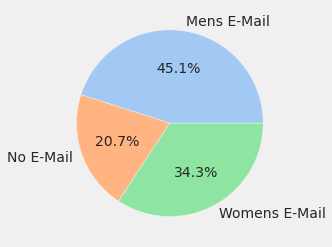

In [31]:
data = [df_visit.groupby(['segment']).sum()["spend"][0],
        df_visit.groupby(['segment']).sum()["spend"][1], 
       df_visit.groupby(['segment']).sum()["spend"][2]]
labels = ['Mens E-Mail', 'No E-Mail', 'Womens E-Mail']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()